In [1]:
# import dependencies
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

df = pd.read_csv(path + '/creditcard.csv')
# print first 5 rows
df.head()

Using Colab cache for faster access to the 'creditcardfraud' dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# check for summary of the central tendency, dispersion, and shape of a dataset's distribution
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# check for null data
df.isnull().sum()

In [ ]:
df['Class'].value_counts() # dataset desbalanced

,count
Class,
0,284315
1,492


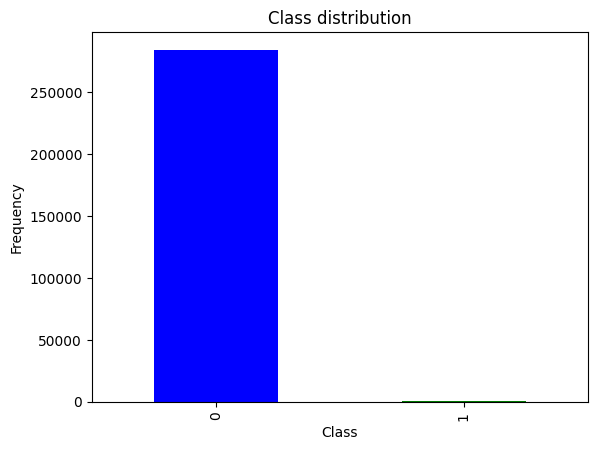

In [4]:
# bar chart to show the imbalance
df['Class'].value_counts().plot(kind='bar', color=['blue','green'])
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## The data is unbalanced; I'm going to train a model without modifying the data and then compare it with other strategies

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model instance
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9991222218320986


## The accuracy is 0.99%. In an unbalanced dataset, the Accuracy metric is misleading because it is dominated by the majority class. It tells us nothing about performance with the minority class that matters to us (frauds).

A confusion matrix typically displays four key values for binary classification:

True Positives (TP): Instances correctly predicted as positive.

True Negatives (TN): Instances correctly predicted as negative.

False Positives (FP): Instances incorrectly predicted as positive (Type I error).

False Negatives (FN): Instances incorrectly predicted as negative (Type II error).

In [7]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[56855     9]
 [   41    57]]


In [8]:
# precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.8636363636363636


In [9]:
# Calculate recall for binary classification
recall = recall_score(y_test, y_pred)
print(f"Recall (binary): {recall}")

Recall (binary): 0.5816326530612245


In [10]:
# Calculate F1 score for binary classification
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.6951219512195121


##**Undersampling**: is a technique to balance datasets by reducing the majority class.

In [11]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
# Using the undersampling technique, we reduce the number of examples of the majority class, leaving us with this shape
X_resampled.shape, y_resampled.shape

((984, 30), (984,))

In [14]:
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.934010152284264


## the accuracy was less than the first model but is more real becouse the dataset is resampling

In [15]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[96  3]
 [10 88]]


In [16]:
# precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.967032967032967


In [17]:
# Calculate recall for binary classification
recall = recall_score(y_test, y_pred)
print(f"Recall (binary): {recall}")

Recall (binary): 0.8979591836734694


In [18]:
# Calculate F1 score for binary classification
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.9312169312169312


##**SMOTE**: is a technique to balance datasets by generating synthetic examples for the minority class.

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9500729824314581


In [21]:
# precision
precision = precision_score(y_test, y_pred)

# Calculate recall for binary classification
recall = recall_score(y_test, y_pred)

# Calculate F1 score for binary classification
f1 = f1_score(y_test, y_pred)


In [22]:
print(f"Precision: {precision}")
print(f"Recall (binary): {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9743139285450108
Recall (binary): 0.9247226902555462
F1 Score: 0.9488707992652091


### Let's make a bar chart to better see and compare the scores for each technique.

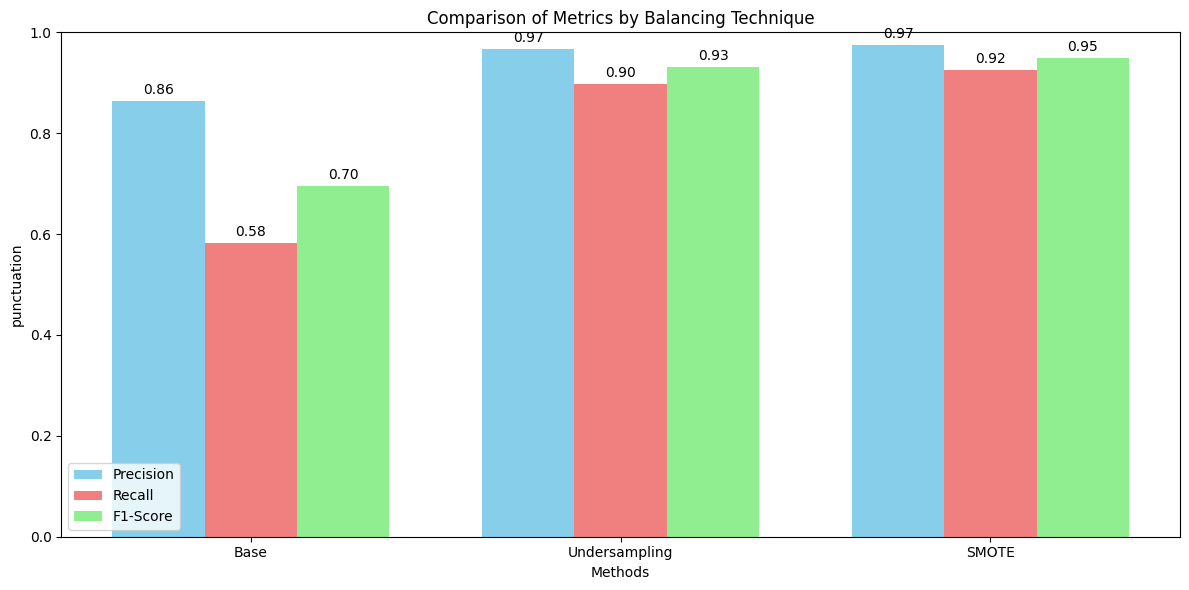

In [24]:
import numpy as np

# Prepare data for the chart
methods = ['Base', 'Undersampling', 'SMOTE']
precision_scores = [0.8636, 0.9670, 0.9743]
recall_scores = [0.5816, 0.8979, 0.9247]
f1_scores = [0.6951, 0.9312, 0.9488]

x = np.arange(len(methods))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, precision_scores, width, label='Precision', color='skyblue')
bars2 = ax.bar(x, recall_scores, width, label='Recall', color='lightcoral')
bars3 = ax.bar(x + width, f1_scores, width, label='F1-Score', color='lightgreen')

# Personalizar gráfico
ax.set_xlabel('Methods')
ax.set_ylabel('punctuation')
ax.set_title('Comparison of Metrics by Balancing Technique')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()
ax.set_ylim(0, 1)

# Añadir valores en las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Now, let's create a model using the random forest classifier, which is excellent for handling unbalanced data.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [33]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

F1-Score: 0.8261
Recall: 0.7755
Accuracy: 0.9994


In [34]:
# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

